In [1]:
import pandas as pd
from pandas import read_excel

file_name = 'target_data.xlsx' 
target_data = read_excel(file_name)
target_data = target_data.fillna(0)

/home/syanakieva/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
feature_cols = list(target_data.columns[1:-6])

X_all = target_data[feature_cols]

In [4]:
from sklearn.ensemble import RandomForestClassifier
import pickle

ccmodel = pickle.load(open('ccmodel.pkl', 'rb'))

prediction = ccmodel.predict(X_all)
sales_cols = list(target_data.columns[:-6])
result = target_data[sales_cols]
result["cc_sales_prediction"] = prediction
result = result[result.cc_sales_prediction == 1]
print(result.shape[0])
print(result[:1000])
result.to_excel("cc_sales_prediction.xlsx", index=False)

285
      Client  Sex  Age  Tenure  Count_CA  Count_SA  Count_MF  Count_OVD  \
18        19  1.0   46      94         1       1.0       0.0        0.0   
19        20  0.0   27     181         1       1.0       0.0        0.0   
20        21  1.0   24      60         1       1.0       0.0        0.0   
21        22  0.0   54       0         1       0.0       0.0        0.0   
28        29  1.0   60     150         1       0.0       0.0        1.0   
...      ...  ...  ...     ...       ...       ...       ...        ...   
1567    1568  1.0   40      17         1       0.0       0.0        0.0   
1570    1571  0.0   39     211         1       0.0       0.0        0.0   
1572    1573  1.0   69     181         1       1.0       0.0        1.0   
1587    1588  0.0   61      37         1       0.0       0.0        1.0   
1599    1600  1.0   44     200         1       1.0       0.0        1.0   

      Count_CC  Count_CL  ...  VolumeDeb_CA  VolumeDebCash_Card  \
18         0.0       0.0  ..

/home/syanakieva/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


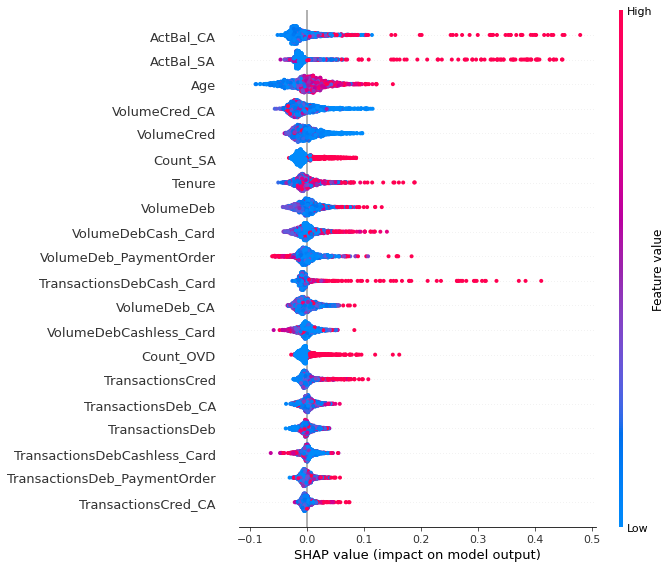

In [13]:
import shap
explainer = shap.TreeExplainer(ccmodel)
shap_values = explainer.shap_values(X_all)

shap.summary_plot(shap_values[1], X_all)